<a href="https://colab.research.google.com/github/ep-ucl/QM2/blob/main/tests/untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Anson422/Anson-Eva-Valerie.git #clone the repository to the local machine
!git install pandas

Cloning into 'Anson-Eva-Valerie'...
remote: Enumerating objects: 5487, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 5487 (delta 207), reused 57 (delta 57), pack-reused 5205 (from 2)
Receiving objects: 100% (5487/5487), 9.01 GiB | 32.99 MiB/s, done.
Resolving deltas: 100% (1885/1885), done.
Updating files: 100% (2890/2890), done.
git: 'install' is not a git command. See 'git --help'.

The most similar command is
	instaweb


In [2]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np


In [3]:
import os
print(os.listdir('/content/Anson-Eva-Valerie/Stacked Bar Chart/data'))

['Slovakia quantity imported in 100kg.xlsx', 'ds-045409__custom_14788878_spreadsheet.xlsx', 'Hungary gas imports in 100 kg.xlsx', 'quarterly_data 2024-10-03.xlsx', 'nrg_ti_gasm$defaultview_page_spreadsheet.xlsx', 'Natural_gas_consumption_statistics_2022-2023_(28-05-2024)_REV_SE_Corrected.xlsx.xls', 'slovakia_100kg_gas_import.xlsx', 'Import-von-russischem-Gas-2024-12-23-19-00-38.xlsx']


In [4]:
Hungary = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/Hungary gas imports in 100 kg.xlsx", sheet_name= "Sheet 1")
Slovakia = pd.read_excel("/content/Anson-Eva-Valerie/Stacked Bar Chart/data/Slovakia quantity imported in 100kg.xlsx", sheet_name= "Sheet 1")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
#Hungary RU import
H_RUvalues = Hungary.loc[10]
H_date = Hungary.loc[8]
H_EXvalues = Hungary.loc[11]
Hungary_data = pd.concat([H_date, H_RUvalues,H_EXvalues], axis=1)
Hungary_data = Hungary_data.rename(columns=Hungary_data.iloc[0]).drop(Hungary_data.index[0])
Hungary_data = Hungary_data.iloc[1:]
Hungary_data = Hungary_data.rename(columns={'Russian Federation (Russia)': 'Imported gas from Russia', 'TIME': 'Date',"Extra-EU27 (= 'WORLD' - 'EU27_2020_INTRA')":"Imported gas from Extra-EU27"})
Hungary_data.index = range(len(Hungary_data.index))
Hungary_data = Hungary_data.loc[432:441]
Hungary_data.index = range(len(Hungary_data.index))
Hungary_data

,Date,Imported gas from Extra-EU27,Imported gas from Russia
0,2024-01,6203514.34,5404219.68
1,2024-02,5582348.64,4350906.37
2,2024-03,5214137.88,4358283.85
3,2024-04,3925470.58,3908913.28
4,2024-05,5846531.5,4031305.34
5,2024-06,5445043.66,4542187.99
6,2024-07,4534065.43,3440613.09
7,2024-08,5708495.19,4243121.89
8,2024-09,5736059.56,4441657.57
9,2024-10,5543811.49,4312370


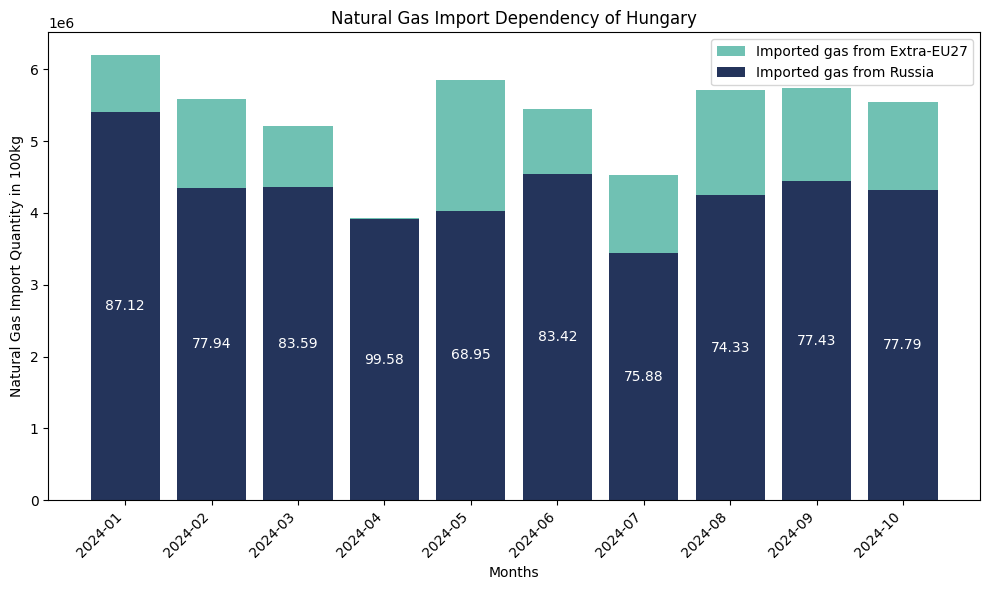

In [7]:
#Draw the chart for Hungary
# set size,style
plt.figure(figsize=(10, 6))

# Calculate the proportion of Russian gas import
Hungary_data['Proportion'] = Hungary_data['Imported gas from Russia'] / Hungary_data['Imported gas from Extra-EU27']*100

# draw bar chart
# First plot 'Import gas from Extra-EU27'
plt.bar(Hungary_data['Date'], Hungary_data['Imported gas from Extra-EU27'], color='#70C1B3',label='Imported gas from Extra-EU27')
# Then plot 'Import gas from Russia' on top
plt.bar(Hungary_data['Date'], Hungary_data['Imported gas from Russia'], color='#24345B',label='Imported gas from Russia')

# add titles
plt.xlabel('Months')
plt.ylabel('Natural Gas Import Quantity in 100kg')
plt.title('Natural Gas Import Dependency of Hungary')
plt.legend()

# 45 degree rotate for nice to read
plt.xticks(rotation=45, ha='right')

# Add proportion annotations
for i, row in Hungary_data.iterrows():
    plt.text(i, row['Imported gas from Russia'] / 2, f"{row['Proportion']:.2f}", ha='center', va='center', color='white')

# show the chart
plt.tight_layout()
plt.show()

In [8]:
#Slovakia RU import
S_RUvalues = Slovakia.loc[10]
S_date = Slovakia.loc[8]
S_EXvalues = Slovakia.loc[11]
Slovakia_data = pd.concat([S_date, S_RUvalues,S_EXvalues], axis=1)
Slovakia_data = Slovakia_data.rename(columns=Slovakia_data.iloc[0]).drop(Slovakia_data.index[0])
Slovakia_data = Slovakia_data.iloc[1:]
Slovakia_data = Slovakia_data.rename(columns={'Russian Federation (Russia)': 'Imported gas from Russia', 'TIME': 'Date',"Extra-EU27 (= 'WORLD' - 'EU27_2020_INTRA')":"Imported gas from Extra-EU27"})
Slovakia_data.index = range(len(Slovakia_data.index))
Slovakia_data = Slovakia_data.loc[432:441]
Slovakia_data.index = range(len(Slovakia_data.index))
Slovakia_data

,Date,Imported gas from Extra-EU27,Imported gas from Russia
0,2024-01,1794381.07,1794381.07
1,2024-02,1794365.62,1794348.72
2,2024-03,1844954.78,1844954.78
3,2024-04,1941053.72,1941053.72
4,2024-05,1933960.51,1933960.51
5,2024-06,2067156.3,2067156.3
6,2024-07,2085488.59,2085488.59
7,2024-08,1951801.64,1951801.64
8,2024-09,2119410.97,2119410.97
9,2024-10,2025381.89,2025381.89


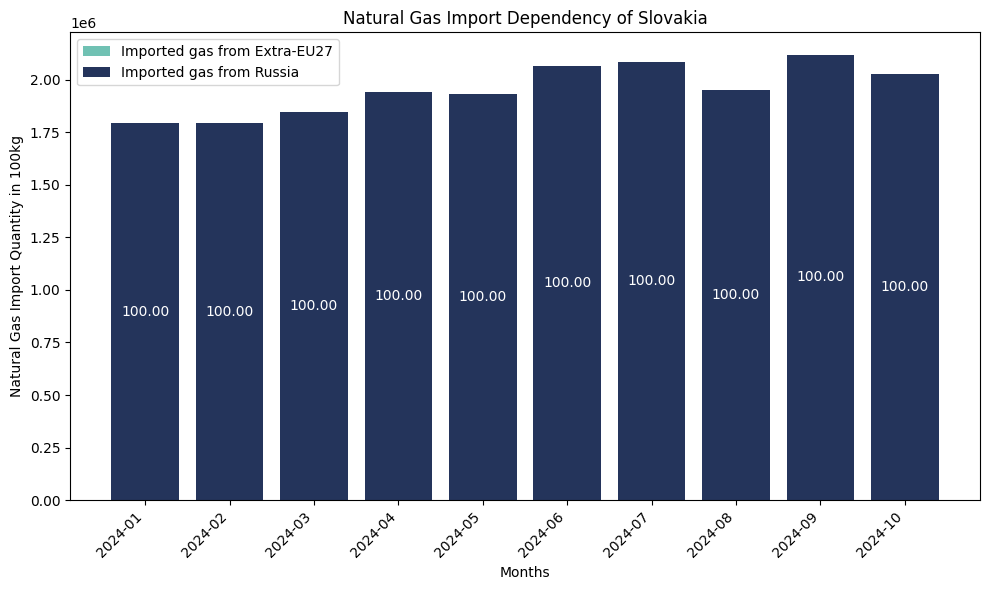

In [9]:
#Draw the chart for Hungary
# set size,style
plt.figure(figsize=(10, 6))

# Calculate the proportion of Russian gas import
Slovakia_data['Proportion'] = Slovakia_data['Imported gas from Russia'] / Slovakia_data['Imported gas from Extra-EU27']*100

# draw bar chart
# First plot 'Import gas from Extra-EU27'
plt.bar(Slovakia_data['Date'], Slovakia_data['Imported gas from Extra-EU27'],color='#70C1B3', label='Imported gas from Extra-EU27')
# Then plot 'Import gas from Russia' on top
plt.bar(Slovakia_data['Date'], Slovakia_data['Imported gas from Russia'],color='#24345B',label='Imported gas from Russia')

# add titles
plt.xlabel('Months')
plt.ylabel('Natural Gas Import Quantity in 100kg')
plt.title('Natural Gas Import Dependency of Slovakia')
plt.legend()

# 45 degree rotate for nice to read
plt.xticks(rotation=45, ha='right')

# Add proportion annotations
for i, row in Slovakia_data.iterrows():
    plt.text(i, row['Imported gas from Russia'] / 2, f"{row['Proportion']:.2f}", ha='center', va='center', color='white')

# show the chart
plt.tight_layout()
plt.show()